In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "./movie_resize.csv"
df = pd.read_csv(data_file, encoding='UTF-8')

In [3]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     4145 non-null   object
 1   감독      4145 non-null   object
 2   배급사     4145 non-null   object
 3   개봉일     4145 non-null   object
 4   영화형태    4145 non-null   object
 5   국적      4145 non-null   object
 6   전국스크린수  4145 non-null   int64 
 7   전국 매출액  4145 non-null   int64 
 8   전국 관객수  4145 non-null   int64 
 9   장르      4145 non-null   object
 10  등급      4145 non-null   object
 11  영화구분    4145 non-null   object
dtypes: int64(3), object(9)
memory usage: 388.7+ KB


# 연도, 월 컬럼 추가

In [5]:
import datetime
df['개봉일']= pd.to_datetime(df['개봉일']) 
df['연도'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month

In [6]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화,2014,7
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화,2019,1
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화,2017,12
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화,2014,12
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화,2019,4


# 계절 컬럼 추가

In [7]:
season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

In [8]:
df['계절'] = df[['월']].apply(lambda x : x.map(season))

In [9]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화,2019,4,봄


In [23]:
df.info()
df.to_csv('df_years_utf-8.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     4145 non-null   object        
 1   감독      4145 non-null   object        
 2   배급사     4145 non-null   object        
 3   개봉일     4145 non-null   datetime64[ns]
 4   영화형태    4145 non-null   object        
 5   국적      4145 non-null   object        
 6   전국스크린수  4145 non-null   int64         
 7   전국 매출액  4145 non-null   int64         
 8   전국 관객수  4145 non-null   int64         
 9   장르      4145 non-null   object        
 10  등급      4145 non-null   object        
 11  영화구분    4145 non-null   object        
 12  연도      4145 non-null   int64         
 13  월       4145 non-null   int64         
 14  계절      4145 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 485.9+ KB


# 데이터 시각화

In [11]:
# 250만 이상 영화들이 어느 계절에 많은지?
# 장르는?

In [12]:
df.sort_values(by=['전국 관객수'], ascending=[False])

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화,2019,4,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,앙상블,정형석,(주)스톰픽쳐스코리아,2020-11-05,장편,한국,52,10376610,1140,드라마,12세관람가,독립/예술영화,2020,11,가을
4141,퍼펙트 스틸,기타,(주)팝엔터테인먼트,2021-10-28,장편,영국,66,10073100,1122,범죄,15세관람가,일반영화,2021,10,가을
4142,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,(주)얼리버드픽쳐스,2021-03-24,장편,일본,60,8850500,1102,애니메이션,전체관람가,일반영화,2021,3,봄
4143,죽을 때까지,기타,(주)제이앤씨미디어그룹,2021-09-09,장편,미국,53,10685640,1047,스릴러,청소년관람불가,일반영화,2021,9,가을


In [13]:
# df2 흥행한 영화 데이터
df2 = df.loc[(df['전국 관객수']>2500000)]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 278
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     279 non-null    object        
 1   감독      279 non-null    object        
 2   배급사     279 non-null    object        
 3   개봉일     279 non-null    datetime64[ns]
 4   영화형태    279 non-null    object        
 5   국적      279 non-null    object        
 6   전국스크린수  279 non-null    int64         
 7   전국 매출액  279 non-null    int64         
 8   전국 관객수  279 non-null    int64         
 9   장르      279 non-null    object        
 10  등급      279 non-null    object        
 11  영화구분    279 non-null    object        
 12  연도      279 non-null    int64         
 13  월       279 non-null    int64         
 14  계절      279 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 34.9+ KB


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [17]:
df2['계절'].value_counts()

여름    105
겨울     65
가을     60
봄      49
Name: 계절, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPytho

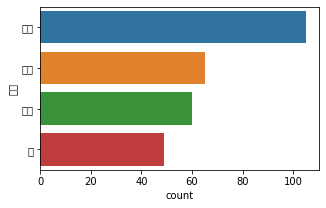

In [18]:
# 계절 별 흥행 영화 카운트
plt.rc('font', family='NanumBarunGothic') 

ordered_index = df2['계절'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df2, y = '계절', order=ordered_index)
plt.show()

In [19]:
df2['장르'].value_counts()

액션          101
드라마          47
범죄           28
코미디          22
애니메이션        18
사극           15
멜로/로맨스       10
SF            9
어드벤처          9
스릴러           6
미스터리          5
판타지           3
공포(호러)        3
전쟁            1
서부극(웨스턴)      1
다큐멘터리         1
Name: 장르, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPytho

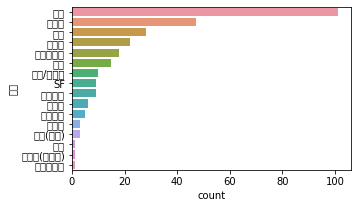

In [20]:
# 장르 별 흥행 영화 카운트

plt.rc('font', family='NanumBarunGothic') 

ordered_index = df2['장르'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df2, y = '장르', order=ordered_index)
plt.show()

<Axes: xlabel='계절', ylabel='count'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **

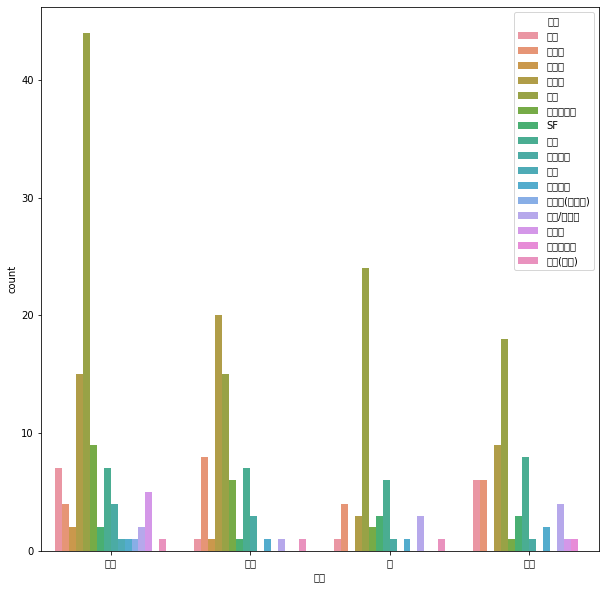

In [21]:
# 계절에 따른 흥행 영화 장르
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10, 10))

sns.countplot(data = df2, x='계절', hue = '장르')